In [1]:
# Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Basic Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import time

# Metrics (Computation)
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import mean_squared_error

# Boosting Algorithms
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

# Neural Network Model
from sklearn.neural_network import MLPClassifier

import warnings

warnings.filterwarnings("ignore")


data = pd.read_csv("heart.csv", header=0)

### Check for missing values

In [2]:
nan_values = data[data.isna().any(axis=1)]         
len(nan_values)

0

In [4]:
data.drop_duplicates(keep = 'first', inplace=True)

### Describe data

In [6]:
data.describe().transpose()

count        mean        std    min     25%    50%     75%    max
age       302.0   54.420530   9.047970   29.0   48.00   55.5   61.00   77.0
sex       302.0    0.682119   0.466426    0.0    0.00    1.0    1.00    1.0
cp        302.0    0.963576   1.032044    0.0    0.00    1.0    2.00    3.0
trtbps    302.0  131.602649  17.563394   94.0  120.00  130.0  140.00  200.0
chol      302.0  246.500000  51.753489  126.0  211.00  240.5  274.75  564.0
fbs       302.0    0.149007   0.356686    0.0    0.00    0.0    0.00    1.0
restecg   302.0    0.526490   0.526027    0.0    0.00    1.0    1.00    2.0
thalachh  302.0  149.569536  22.903527   71.0  133.25  152.5  166.00  202.0
exng      302.0    0.327815   0.470196    0.0    0.00    0.0    1.00    1.0
oldpeak   302.0    1.043046   1.161452    0.0    0.00    0.8    1.60    6.2
slp       302.0    1.397351   0.616274    0.0    1.00    1.0    2.00    2.0
caa       302.0    0.718543   1.006748    0.0    0.00    0.0    1.00    4.0
thall     302.0    2.314570   0.613026    0.0    2.00    2.0    3.00    3.0
output    302.0    0.543046   0.498970    0.0    0.00    1.0    1.00    1.0

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trtbps    302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalachh  302 non-null    int64  
 8   exng      302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slp       302 non-null    int64  
 11  caa       302 non-null    int64  
 12  thall     302 non-null    int64  
 13  output    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


### Visualize dataset

In [8]:
# Classification columns
class_cols = ["sex", "output", "cp", "fbs", "exng", "restecg", "thall", "caa", "slp"]
class_data = data[class_cols]

# Numeric columns
numeric_cols = ["age", "trtbps", "chol", "thalachh", "oldpeak"]
numeric_data = data[numeric_cols]

In [9]:
ax = px.pie(
    data,
    names="output",
    title="output",
    hole=0.6,
    color="output",
    color_discrete_sequence=["#abacb0", "#4b7dcc"],
    labels={"output": "Stopień ryzyka zawału"},
)
ax.update_layout(legend_title_text="Heart risk")
ax.show()

In [10]:
X = data[data["sex"] == 1].reset_index()
Y = data[data["sex"] == 0].reset_index()

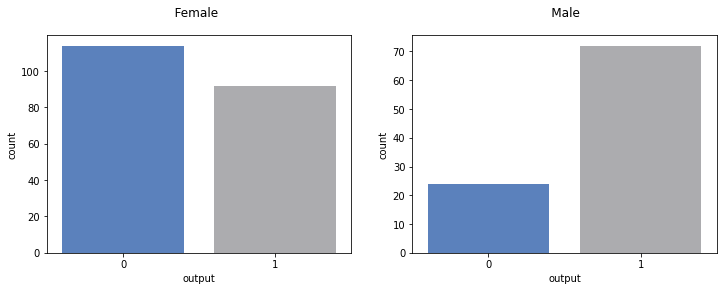

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
plt.suptitle("   Female                                                                                      Male")
ax1 = sns.countplot("output", data=X, palette=["#4b7dcc", "#abacb0"], ax=ax[0])
ax2 = sns.countplot("output", data=Y, palette=["#4b7dcc", "#abacb0"], ax=ax[1])
fig.show()

In [12]:
fig = go.Figure()
fig.add_trace(
    go.Box(
        y=Y["age"],
        name="Male",
        marker_color="#abacb0",
        boxpoints="all",
        whiskerwidth=0.3,
    )
)
fig.add_trace(
    go.Box(
        y=X["age"],
        name="Female",
        marker_color="#4b7dcc",
        boxpoints="all",
        whiskerwidth=0.3,
    )
)
fig.update_layout(title="Age Distribution", height=600)
fig.show()

In [13]:
data1 = data.copy(deep=True)
data1["output"].replace({0: "niskie", 1: "wysokie"}, inplace=True)
data1["cp"].replace({0: "brak", 1: "lekki", 2: "umiarkowany", 3: "duży"}, inplace=True)
data1["fbs"].replace({0: "prawidłowy", 1: "wysoki"}, inplace=True)
data1["exng"].replace({0: "brak", 1: "obecny"}, inplace=True)
data1["restecg"].replace(
    {0: "prawidłowy", 1: "nieprawidłowy", 2: "przerost lewej komory"}, inplace=True
)
data1["thall"].replace(
    {1: "brak wady", 2: "wada wyleczona", 3: "wada odwracalna"}, inplace=True
)
data1["slp"].replace({0: "rosnące", 1: "płaskie", 2: "malejące"}, inplace=True)
data1

age  sex           cp  trtbps  chol         fbs        restecg  thalachh  \
0     63    1         duży     145   233      wysoki     prawidłowy       150   
1     37    1  umiarkowany     130   250  prawidłowy  nieprawidłowy       187   
2     41    0        lekki     130   204  prawidłowy     prawidłowy       172   
3     56    1        lekki     120   236  prawidłowy  nieprawidłowy       178   
4     57    0         brak     120   354  prawidłowy  nieprawidłowy       163   
..   ...  ...          ...     ...   ...         ...            ...       ...   
298   57    0         brak     140   241  prawidłowy  nieprawidłowy       123   
299   45    1         duży     110   264  prawidłowy  nieprawidłowy       132   
300   68    1         brak     144   193      wysoki  nieprawidłowy       141   
301   57    1         brak     130   131  prawidłowy  nieprawidłowy       115   
302   57    0        lekki     130   236  prawidłowy     prawidłowy       174   

       exng  oldpeak       slp  caa            thall   output  
0      brak      2.3   rosnące    0        brak wady  wysokie  
1      brak      3.5   rosnące    0   wada wyleczona  wysokie  
2      brak      1.4  malejące    0   wada wyleczona  wysokie  
3      brak      0.8  malejące    0   wada wyleczona  wysokie  
4    obecny      0.6  malejące    0   wada wyleczona  wysokie  
..      ...      ...       ...  ...              ...      ...  
298  obecny      0.2   płaskie    0  wada odwracalna   niskie  
299    brak      1.2   płaskie    0  wada odwracalna   niskie  
300    brak      3.4   płaskie    2  wada odwracalna   niskie  
301  obecny      1.2   płaskie    1  wada odwracalna   niskie  
302    brak      0.0   płaskie    1   wada wyleczona   niskie  

[302 rows x 14 columns]

In [14]:
class_cols = ["output", "cp", "fbs", "exng", "restecg", "thall", "caa", "slp"]
titles = [
    "Ryzyko zawału",
    "Ból w klatce",
    "Cukier na czczo",
    "Ból w klatce spowodowany wysiłkiem",
    "Spoczynkowy pomiar elektrokardiograficzny",
    "Niedokrwistość tarczowatokrwinkowa",
    "Liczba większych tętnic",
    "Szczytowe nachylenie odcinka ST w trakcie ćwiczeń",
]
sex = ["1 Female", "0 Male"]
colors = ["#4b7dcc", "#abacb0"]
position = {"1 Female": (0.915, 1), "0 Male": (0.915, 0.9)}
for col, title in zip(class_cols, titles):
    ax = px.sunburst(
        data1,
        names=col,
        path=["sex", col],
        color="sex",
        color_continuous_scale=["#abacb0", "#4b7dcc"],
        title=f"{title}",
    )
    ax.update_layout(showlegend=False)
    for i, m in enumerate(sex):
        x, y = position[m]
        ax.add_annotation(
            dict(
                font=dict(color=colors[i], size=15),
                x=x,
                y=y,
                showarrow=False,
                text=str(sex[i]),
                textangle=0,
                xanchor="left",
                xref="paper",
                yref="paper",
            )
        )

    ax.show()

In [15]:
for col in class_cols[2:]:
    ax = px.pie(
        data,
        names=col,
        title=col,
        hole=0.7,
        color=col,
        color_discrete_sequence=["#abacb0", "#4b7dcc", "#8d8e91", "#1e3dba", "#475aa8"],
    )
    ax.show()

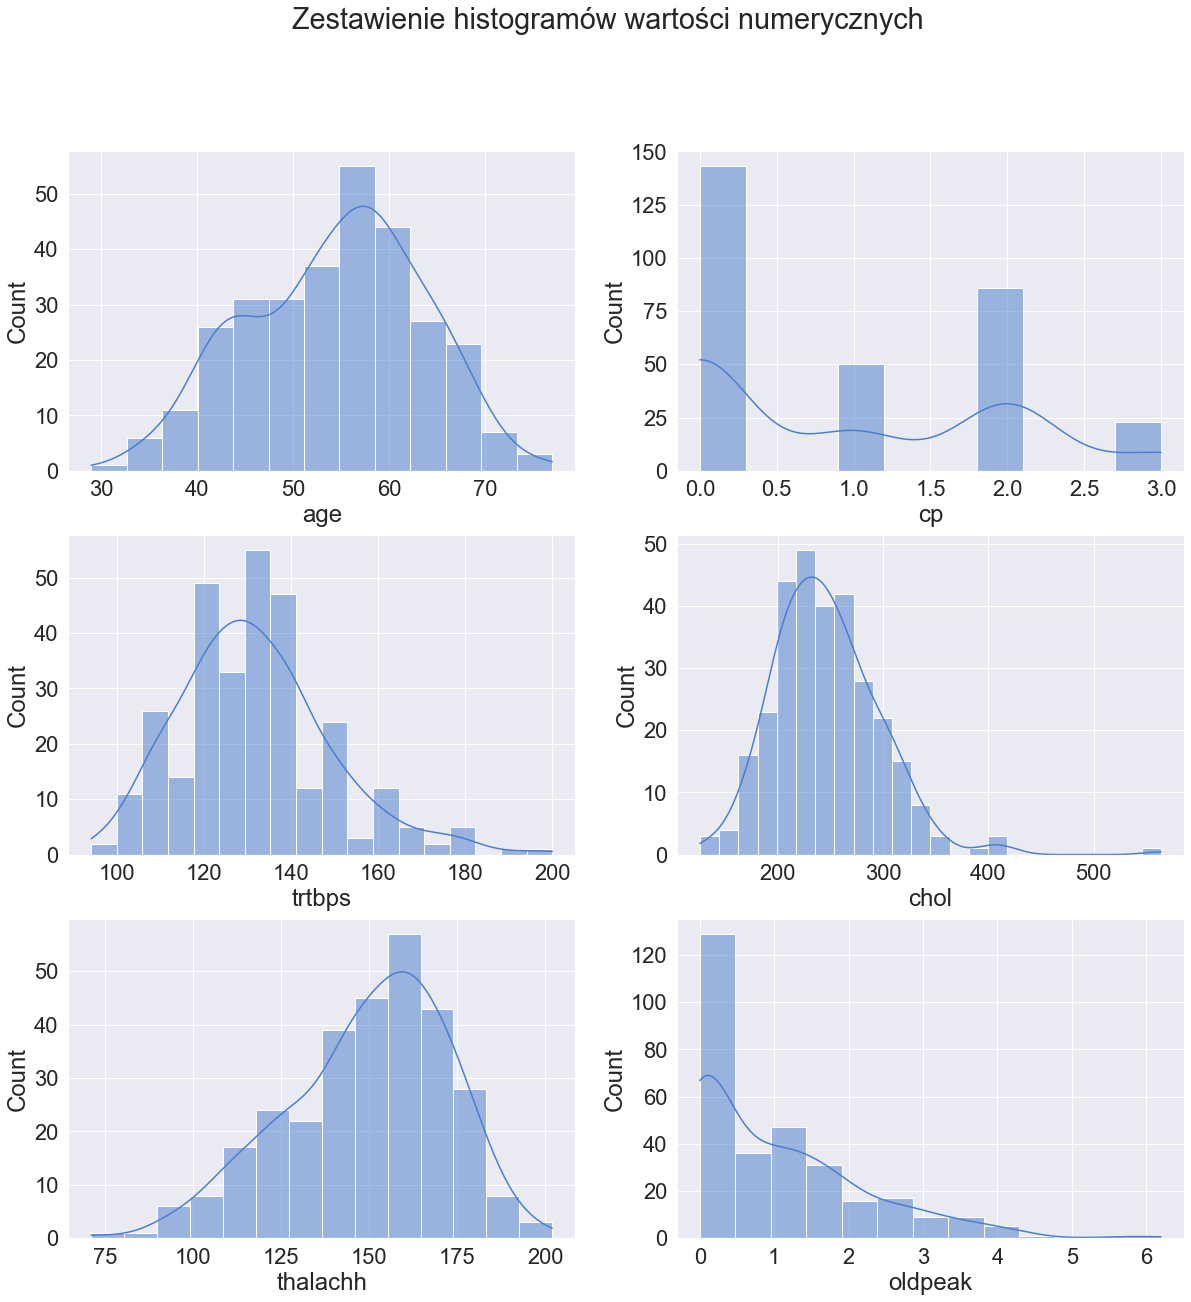

In [16]:
columns = ["age", "cp", "trtbps", "chol", "thalachh", "oldpeak"]
sns.set(font_scale=2)
fig, ax = plt.subplots(3, 2, figsize=(20, 20))
k = 0
for i in range(3):
    for j in range(2):
        ax1 = sns.histplot(data[columns[k]], ax=ax[i][j], color="#4b7dcc", kde=True)
        k += 1
fig.suptitle("Zestawienie histogramów wartości numerycznych")
plt.show()

# Data preparation

### Checking the correlation between the output parameter and the others

exng        0.435601
cp          0.432080
oldpeak     0.429146
thalachh    0.419955
caa         0.408992
slp         0.343940
thall       0.343101
sex         0.283609
age         0.221476
trtbps      0.146269
restecg     0.134874
chol        0.081437
fbs         0.026826
Name: output, dtype: float64


<Figure size 1152x576 with 0 Axes>

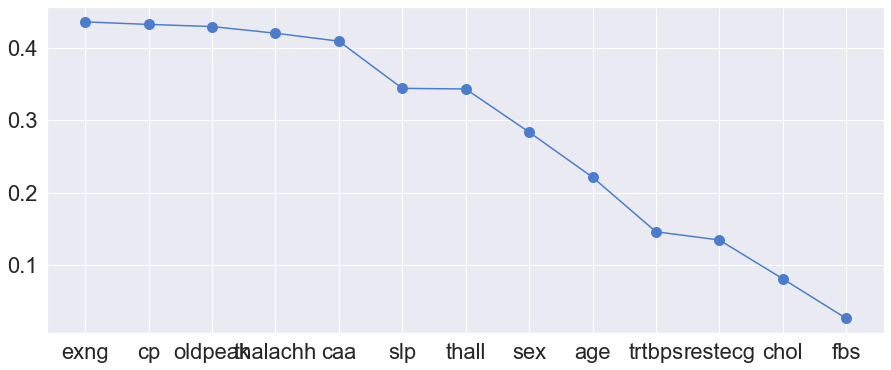

In [17]:
new_df = data.copy()
plt.figure(figsize=(16, 8))
corr = new_df.corr()
C = abs(corr["output"]).sort_values(ascending=False)[1:]
print(C)
plt.figure(figsize=(15, 6))
plt.plot(C.index, C, color="#4b7dcc")
plt.scatter(C.index, C, color="#4b7dcc", lw=5)
plt.show()

### Outliers and their "embrace"

### Delete outliers

In [18]:
continuous_cols = ["age", "trtbps", "chol", "thalachh", "oldpeak"]
continuous_data = data[continuous_cols]

for k, v in continuous_data.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    for index, value in enumerate(v):
        if (value <= q1 - 1.5 * irq) | (value >= q3 + 1.5 * irq):
            data.drop([index], inplace=True, errors='ignore')

### Log transform the data using numpy

In [19]:
# Using log transformation
data["age"] = np.log(data.age)
data["trtbps"] = np.log(data.trtbps)
data["chol"] = np.log(data.chol)
data["thalachh"] = np.log(data.thalachh)

---Log Transform performed---
Column age outliers = 1 => 0.36%
Column trtbps outliers = 6 => 2.158%
Column chol outliers = 4 => 1.439%
Column thalachh outliers = 3 => 1.079%
Column oldpeak outliers = 5 => 1.799%


In [20]:
continuous_cols = ["age", "trtbps", "chol", "thalachh", "oldpeak"]
continuous_data = data[continuous_cols]

for k, v in continuous_data.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
    print("Column {} outliers = {} => {}%".format(k, len(v_col), round((perc), 3)))

Column age outliers = 1 => 0.36%
Column trtbps outliers = 6 => 2.158%
Column chol outliers = 4 => 1.439%
Column thalachh outliers = 3 => 1.079%
Column oldpeak outliers = 5 => 1.799%


### Split of data into training and testing

In [21]:
X = data.iloc[:, :len(data.columns)-1]
MM_scaler = MinMaxScaler()
MM_scaler.fit(X)
X = MM_scaler.transform(X)

In [22]:

# Data Splitting and scaling
X = data.iloc[:, :len(data.columns)-1]
Y = data["output"]

MM_scaler = MinMaxScaler()
MM_scaler.fit(X)
X = MM_scaler.transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=65
)

### A function for visualizing and calculating the effectiveness of a given algorithm

In [23]:
def compute(Y_pred, Y_test) -> None:
    
    # Output plot
    plt.figure(figsize=(12, 6))
    plt.scatter(range(len(Y_pred)), Y_pred, color="#4b7dcc", lw=6, label="Predictions")
    plt.scatter(range(len(Y_test)), Y_test, color="#abacb0", label="Actual")
    plt.title("Prediction Values vs Real Values")
    plt.legend()
    plt.show()

    cm = confusion_matrix(Y_test, Y_pred)
    class_label = ["High-risk", "Low-risk"]
    df_cm = pd.DataFrame(cm, index=class_label, columns=class_label)
    color_palete = sns.color_palette("light:#4b7dcc", as_cmap=True)
    sns.heatmap(df_cm, annot=True, cmap=color_palete, linewidths=2, fmt="d")
    plt.title("Confusion Matrix", fontsize=15)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    # Calculate Metrics
    acc = accuracy_score(Y_test, Y_pred)
    mse = mean_squared_error(Y_test, Y_pred)
    precision, recall, fscore, train_support = score(
        Y_test, Y_pred, pos_label=1, average="binary"
    )
    print(
        "Precision: {} \nRecall: {} \nF1-Score: {} \nAccuracy: {} %\nMean Square Error: {}".format(
            round(precision, 3),
            round(recall, 3),
            round(fscore, 3),
            round((acc * 100), 3),
            round((mse), 3),
        )
    )

### Regression model

Execution time of model: 0.005 seconds



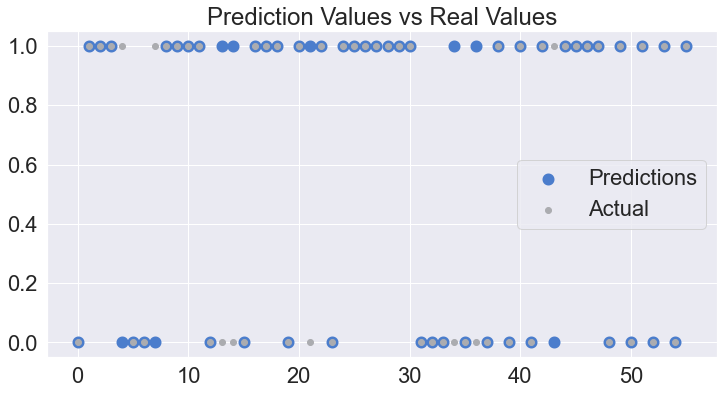

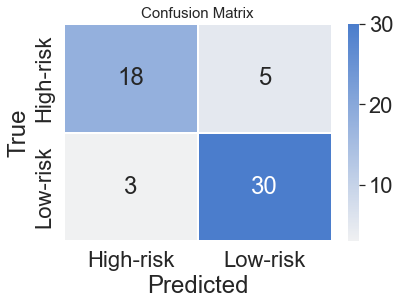

Precision: 0.857 
Recall: 0.909 
F1-Score: 0.882 
Accuracy: 85.714 %
Mean Square Error: 0.143


In [24]:
# Build Model
start = time.time()

model_Log = LogisticRegression(random_state=10)
model_Log.fit(X_train, Y_train)
Y_pred = model_Log.predict(X_test)

end = time.time()

model_Log_time = end - start
model_Log_accuracy = round(accuracy_score(Y_test, Y_pred), 4) * 100  # Accuracy

print(f"Execution time of model: {round((model_Log_time),5)} seconds\n")
# Plot and compute metrics
compute(Y_pred, Y_test)

### K closest neighbors

Execution time of model: 0.003 seconds


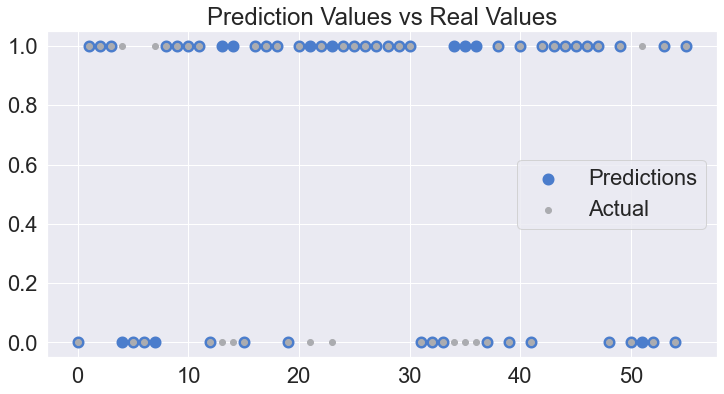

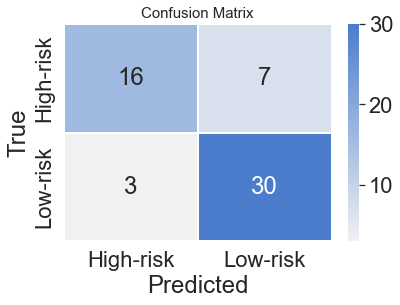

Precision: 0.811 
Recall: 0.909 
F1-Score: 0.857 
Accuracy: 82.143 %
Mean Square Error: 0.179


In [25]:
# Build Model
start = time.time()

model_KNN = KNeighborsClassifier(n_neighbors=15)
model_KNN.fit(X_train, Y_train)
Y_pred = model_KNN.predict(X_test)

end = time.time()

model_KNN_time = end - start
model_KNN_accuracy = round(accuracy_score(Y_test, Y_pred), 4) * 100  # Accuracy

print(f"Execution time of model: {round((model_KNN_time),5)} seconds")
# Plot and compute metric
compute(Y_pred, Y_test)

### Support Vector Machines

Execution time of model: 0.002 seconds


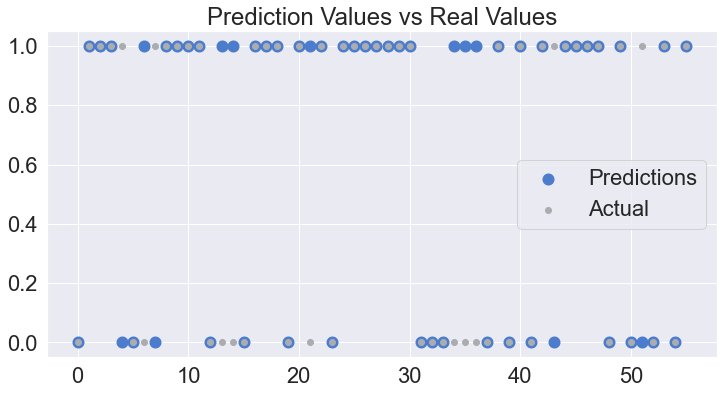

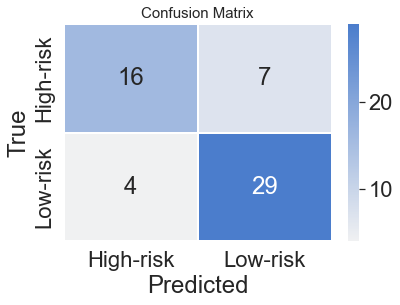

Precision: 0.806 
Recall: 0.879 
F1-Score: 0.841 
Accuracy: 80.357 %
Mean Square Error: 0.196


In [26]:
# Build Model
start = time.time()

model_svm = SVC(kernel="rbf")
model_svm.fit(X_train, Y_train)
Y_pred = model_svm.predict(X_test)

end = time.time()

model_svm_time = end - start
model_svm_accuracy = round(accuracy_score(Y_test, Y_pred), 4) * 100  # Accuracy

print(f"Execution time of model: {round((model_svm_time),5)} seconds")
# Plot and compute metric
compute(Y_pred, Y_test)

### Decision tree

Execution time of model: 0.002 seconds


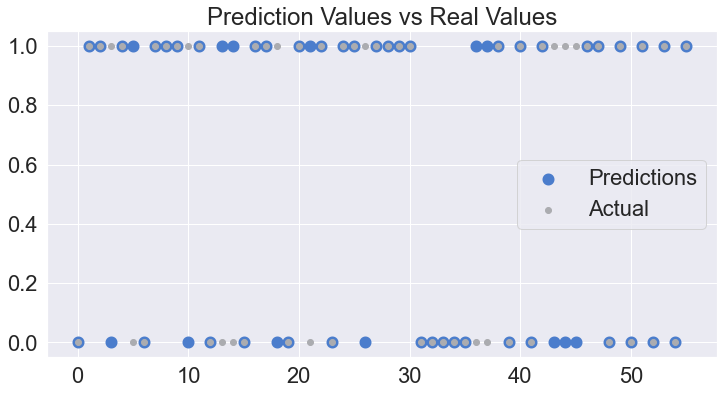

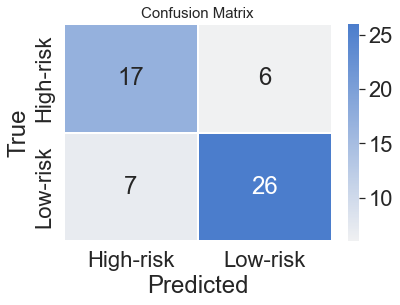

Precision: 0.812 
Recall: 0.788 
F1-Score: 0.8 
Accuracy: 76.786 %
Mean Square Error: 0.232


In [27]:
# Build Model
start = time.time()

model_tree = DecisionTreeClassifier(random_state=10, criterion="gini", max_depth=100)
model_tree.fit(X_train, Y_train)
Y_pred = model_tree.predict(X_test)

end = time.time()

model_tree_time = end - start
model_tree_accuracy = round(accuracy_score(Y_test, Y_pred), 4) * 100  # Accuracy

print(f"Execution time of model: {round((model_tree_time),5)} seconds")
# Plot and compute metric
compute(Y_pred, Y_test)

### Random Forest Classifier

Execution time of model: 0.21019 seconds


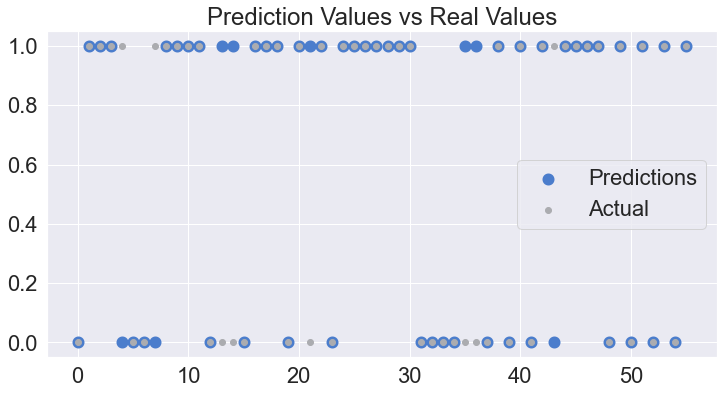

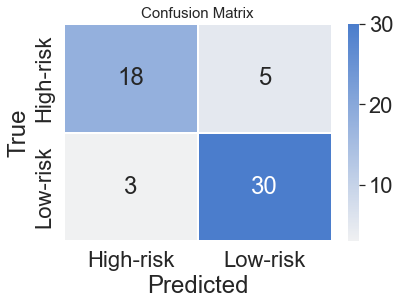

Precision: 0.857 
Recall: 0.909 
F1-Score: 0.882 
Accuracy: 85.714 %
Mean Square Error: 0.143


In [28]:
# Build Model
start = time.time()

model_RF = RandomForestClassifier(
    n_estimators=300, criterion="gini", random_state=5, max_depth=100
)
model_RF.fit(X_train, Y_train)
Y_pred = model_RF.predict(X_test)

end = time.time()

model_RF_time = end - start
model_RF_accuracy = round(accuracy_score(Y_test, Y_pred), 4) * 100  # Accuracy

print(f"Execution time of model: {round((model_RF_time),5)} seconds")
# Plot and compute metric
compute(Y_pred, Y_test)

### AdaBoost Classifier

Execution time of model: 0.02002 seconds


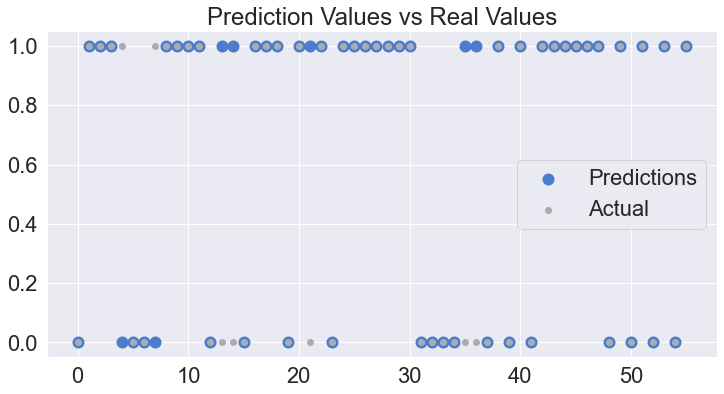

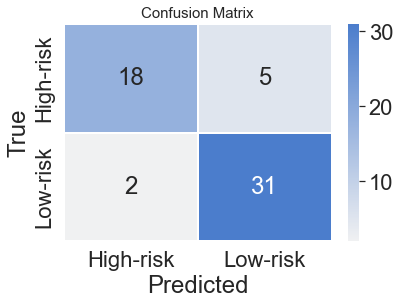

Precision: 0.861 
Recall: 0.939 
F1-Score: 0.899 
Accuracy: 87.5 %
Mean Square Error: 0.125


In [29]:
# Build Model
start = time.time()

model_ADA = AdaBoostClassifier(learning_rate=0.15, n_estimators=25)
model_ADA.fit(X_train, Y_train)
Y_pred = model_ADA.predict(X_test)

end = time.time()

model_ADA_time = end - start
model_ADA_accuracy = round(accuracy_score(Y_test, Y_pred), 4) * 100  # Accuracy

print(f"Execution time of model: {round((model_ADA_time),5)} seconds")
# Plot and compute metric
compute(Y_pred, Y_test)

### Gradient Boosting Classifier

Execution time of model: 0.00901 seconds


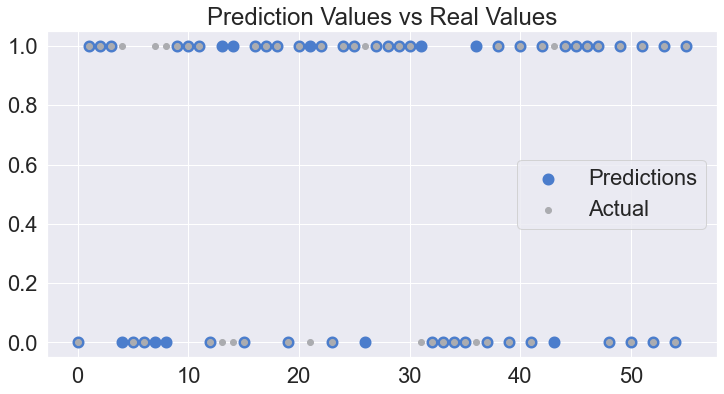

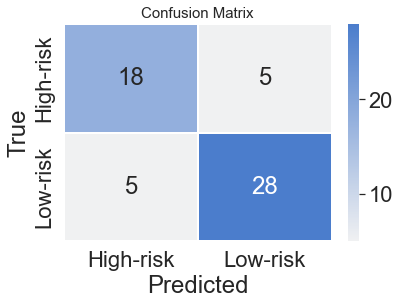

Precision: 0.848 
Recall: 0.848 
F1-Score: 0.848 
Accuracy: 82.143 %
Mean Square Error: 0.179


In [30]:
# Build Model
start = time.time()

model_GB = GradientBoostingClassifier(
    random_state=10, n_estimators=20, learning_rate=0.29, loss="deviance"
)
model_GB.fit(X_train, Y_train)
Y_pred = model_GB.predict(X_test)

end = time.time()

model_GB_time = end - start
model_GB_accuracy = round(accuracy_score(Y_test, Y_pred), 4) * 100  # Accuracy

print(f"Execution time of model: {round((model_GB_time),5)} seconds")
# Plot and compute metric
compute(Y_pred, Y_test)

### XGBoost Classifier

Execution time of model: 0.03803 seconds


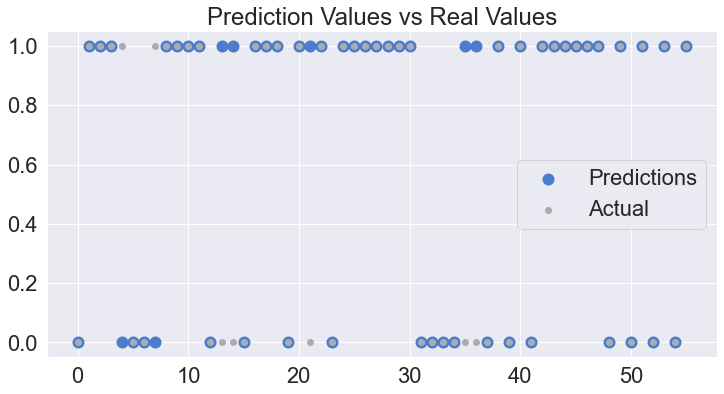

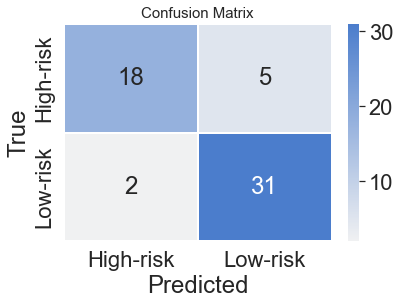

Precision: 0.861 
Recall: 0.939 
F1-Score: 0.899 
Accuracy: 87.5 %
Mean Square Error: 0.125


In [31]:
# Build Model
start = time.time()

model_xgb = XGBClassifier(
    objective="binary:logistic",
    learning_rate=0.1,
    max_depth=1,
    n_estimators=50,
    colsample_bytree=0.5,
)
model_xgb.fit(X_train, Y_train)
Y_pred = model_xgb.predict(X_test)

end = time.time()

model_xgb_time = end - start
model_xgb_accuracy = round(accuracy_score(Y_test, Y_pred), 4) * 100  # Accuracy

print(f"Execution time of model: {round((model_xgb_time),5)} seconds")
# Plot and compute metric
compute(Y_pred, Y_test)

### MLPClassifier

Execution time of model: 0.36433 seconds


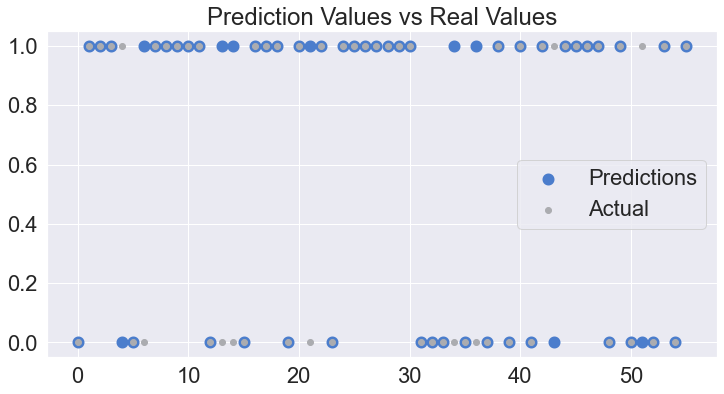

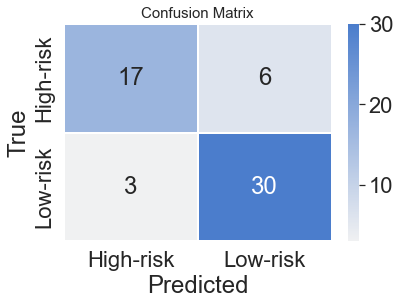

Precision: 0.833 
Recall: 0.909 
F1-Score: 0.87 
Accuracy: 83.929 %
Mean Square Error: 0.161


In [34]:
# Build Model
start = time.time()

model_MLP = MLPClassifier(
    random_state=48,
    hidden_layer_sizes=(150, 100, 50),
    max_iter=150,
    activation="relu",
    solver="adam",
)
model_MLP.fit(X_train, Y_train)
Y_pred = model_MLP.predict(X_test)

end = time.time()

model_MLP_time = end - start
model_MLP_accuracy = round(accuracy_score(Y_test, Y_pred), 4) * 100  # Accuracy

print(f"Execution time of model: {round((model_MLP_time),5)} seconds")
# Plot and compute metric
compute(Y_pred, Y_test)

In [47]:
accuracies={"Logistic regression": model_Log_accuracy,
            "KNN": model_KNN_accuracy,
            "SVM": model_svm_accuracy,
            "Decision Tree": model_tree_accuracy,
            "Random Forest": model_RF_accuracy,
            "Ada Boost": model_ADA_accuracy,
            "Gradient Boosting": model_GB_accuracy,
            "XG Boost": model_xgb_accuracy,
            "MLP Classifier": model_MLP_accuracy}

accuracies = dict(sorted(accuracies.items(), key=lambda item: item[1], reverse=True))
print(accuracies)

{'Ada Boost': 87.5, 'XG Boost': 87.5, 'Logistic regression': 85.71, 'Random Forest': 85.71, 'MLP Classifier': 83.93, 'KNN': 82.14, 'Gradient Boosting': 82.14, 'SVM': 80.36, 'Decision Tree': 76.79}


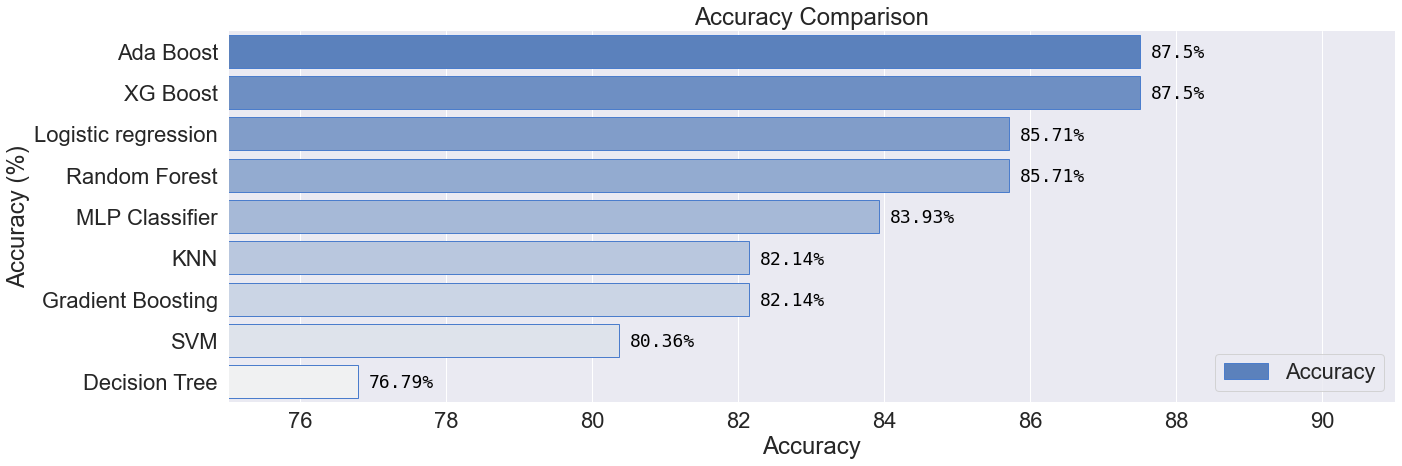

In [91]:
accuracies={"Logistic regression": model_Log_accuracy,
            "KNN": model_KNN_accuracy,
            "SVM": model_svm_accuracy,
            "Decision Tree": model_tree_accuracy,
            "Random Forest": model_RF_accuracy,
            "Ada Boost": model_ADA_accuracy,
            "Gradient Boosting": model_GB_accuracy,
            "XG Boost": model_xgb_accuracy,
            "MLP Classifier": model_MLP_accuracy}

acc_list=accuracies.items()
k,v = zip(*acc_list) 
temp=pd.DataFrame(index=k,data=v,columns=["Accuracy"])
temp.sort_values(by=["Accuracy"],ascending=False,inplace=True)

#Plot accuracy for different models
plt.figure(figsize=(20,7))
ACC=sns.barplot(y=temp.index, x=temp["Accuracy"], label="Accuracy", edgecolor="#4b7dcc", linewidth=1, orient="h", palette="light:#4b7dcc_r")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy Comparison")
plt.xlim(75, 91)

ACC.spines['left'].set_linewidth(3)
for w in ['right', 'top', 'bottom']:
    ACC.spines[w].set_visible(False)
#Write text on barplots
k=0
for ACC in ACC.patches:
    width = ACC.get_width()
    height = ACC.get_height()
    plt.text(width+0.15, (ACC.get_y() + ACC.get_height()-0.25),s="{}%".format(temp["Accuracy"][k]), fontname = 'monospace', fontsize = 18, color = 'black') 
    k+=1
    
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

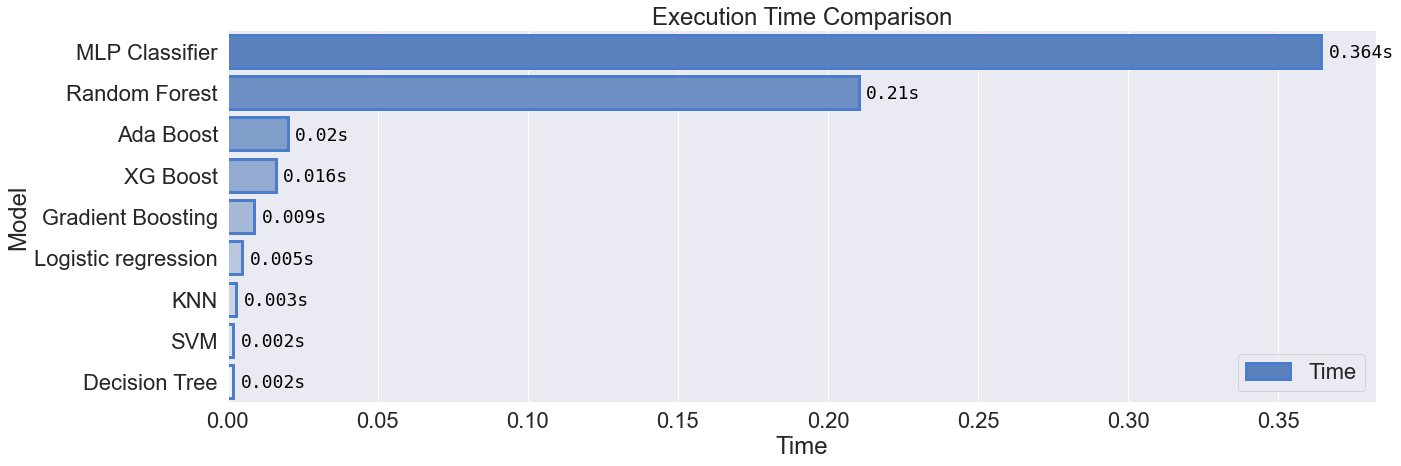

In [105]:
exe_time={"Logistic regression": model_Log_time,
            "KNN": model_KNN_time,
            "SVM": model_svm_time,
            "Decision Tree": model_tree_time,
            "Random Forest": model_RF_time,
            "Ada Boost": model_ADA_time,
            "Gradient Boosting": model_GB_time,
            "XG Boost": model_xgb_time,
            "MLP Classifier": model_MLP_time }

time_list=exe_time.items()
k,v = zip(*time_list) 
temp1=pd.DataFrame(index=k,data=v,columns=["Time"])
temp1.sort_values(by=["Time"],ascending=False,inplace=True)

#Plot accuracy for different models
plt.figure(figsize=(20,7))
ET=sns.barplot(y=temp1.index, x=temp1["Time"], label="Time", edgecolor="#4b7dcc", linewidth=3, orient="h", palette="light:#4b7dcc_r")
plt.ylabel("Model")
plt.title("Execution Time Comparison")
ET.spines['left'].set_linewidth(3)
for w in ['right', 'top', 'bottom']:
    ET.spines[w].set_visible(False)

#Write text on barplots
k=0
for ET in ET.patches:
    width = ET.get_width()
    plt.text(width+0.0025, (ET.get_y() + ET.get_height()-0.25),s="{}s".format(round((temp1["Time"][k]),3)), fontname = 'monospace', fontsize = 18, color = 'black') 
    k+=1

plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

### Save model with the highest accuracy

In [35]:
import pickle

pickle.dump(model_xgb, open("model_xgb_HSR_basic", "wb"))
pickle.dump(MM_scaler, open("data_scaler_basic", "wb"))

### Compare the accuracy and precision of all used machine learning algorithms

RMSE is lowest at 0.125 for n: [50] 


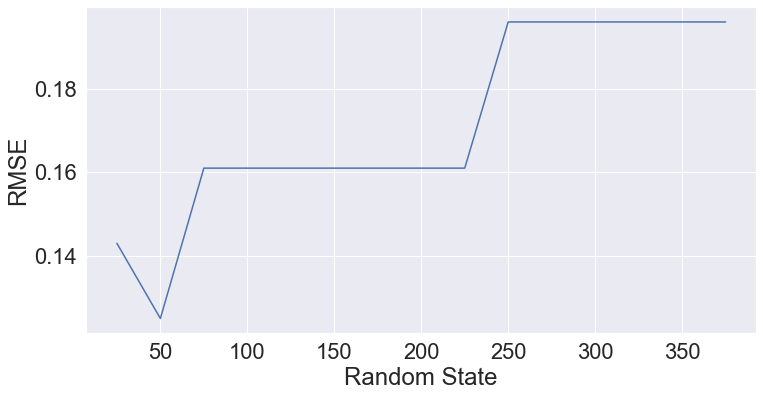

Accuracy is highest at 87.5 % for n: [50] 


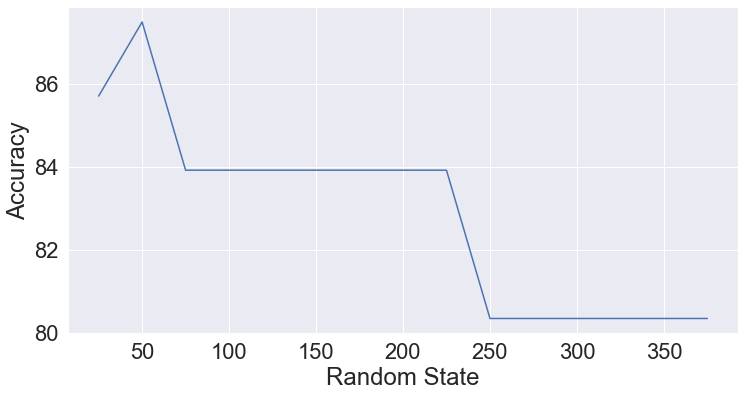

In [36]:
def checkRS() -> None:

    mse_dict = {}  # Root mean square dictionary
    acc_dict = {}  # Accuracy dictionary

    for n in range(25, 400, 25):
        X_train, X_test, Y_train, Y_test = train_test_split(
            X, Y, test_size=0.2, random_state=65
        )
        model_MLP = MLPClassifier(
            random_state=48,
            hidden_layer_sizes=(150, 100, 50),
            max_iter=n,
            activation="relu",
            solver="adam",
        )
        model_MLP.fit(X_train, Y_train)
        Y_pred = model_MLP.predict(X_test)
        acc = accuracy_score(Y_test, Y_pred)
        mse = mean_squared_error(Y_test, Y_pred)
        mse_dict.update({n: round(mse, 3)})
        acc_dict.update({n: round((acc * 100), 3)})

    # Mean Square Error
    lowest = min(mse_dict.values())
    res = [key for key in mse_dict if mse_dict[key] == lowest]
    mse_list = mse_dict.items()
    k, v = zip(*mse_list)
    print("RMSE is lowest at {} for n: {} ".format(round((lowest), 3), res))

    # Plot RMSE values
    plt.figure(figsize=(12, 6))
    plt.plot(k, v)
    plt.xlabel("Random State")
    plt.ylabel("RMSE")
    plt.grid(True)
    plt.show()

    # Accuracy
    highest = max(acc_dict.values())
    res1 = [key for key in acc_dict if acc_dict[key] == highest]
    acc_list = acc_dict.items()
    k1, v1 = zip(*acc_list)
    print("Accuracy is highest at {} % for n: {} ".format(highest, res1))
    # Plot Accuracy values
    plt.figure(figsize=(12, 6))
    plt.plot(k1, v1)
    plt.xlabel("Random State")
    plt.ylabel("Accuracy")
    plt.grid(True)
    plt.show()


checkRS()

In [37]:
from pandas_profiling import ProfileReport

profile = ProfileReport(data, title="Pandas Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]